In [1]:
try:
        
    import h5py

    import matplotlib.pyplot as mplt
    import numpy as np
    import seaborn as sns 
    import ipywidgets as widgets
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    import matplotlib.ticker as ticker
    from matplotlib.collections import PatchCollection
    import os
   
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


'C:\\00_ERAN\\Academics\\ORCHID_v2\\HDF5_files'

In [6]:
###### #### GUI 
current_folder = os.getcwd()
parent_folder = os.path.dirname(os.path.abspath(current_folder))
parent_folder2 = os.path.dirname(os.path.abspath(parent_folder)) #Note that HDF5 files are saved in a folder directly outside the repo as these files can be large.
hdf5_folder = os.path.join(parent_folder2, "HDF5_files")

os.chdir(hdf5_folder)


edt_filename = widgets.Text(description = 'File name', value='test')
btn_select = widgets.Button(description = 'Select file',button_style='success')
output_file = widgets.Output()

display(edt_filename ,btn_select,output_file)


def btn_select_clicked(b):
    global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux
    
    file_name = edt_filename.value
   
    try: 
        with h5py.File(file_name, mode='r') as hdf:
            
            print("File found and content loaded into memory")
            global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]

            total_steps = total_t /dt          
            interval_step = total_steps / intervals

            interval_arr = [round(interval_step * i) for i in range(intervals)]
            
            master_arr = []
            t_arr =[]
            
            print(intervals)
            print(interval_arr[0:5])
            print(total_steps)
            
            ##### LOADING COMPARTMENT DATA
            for e in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[e])
                C_group_arr.append(C_group)
                print(len(list(C_group.keys())))
                data_arr_2 =[]
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    
                    data_arr = []
                    for d in range(len(list(dataset))):
                        data_arr.append(dataset[d])
                    
                    data_arr_2.append(data_arr)
            
                    if t_arr_bool == True:
                        t_arr.append(data_arr[0])         
                
                master_arr.append(data_arr_2)
                t_arr_bool = False
            
         
    except: 
        raise("File not found")
        raise("File needs to be in base directory")


btn_select.on_click(btn_select_clicked)

Text(value='test', description='File name')

Button(button_style='success', description='Select file', style=ButtonStyle())

Output()

TypeError: exceptions must derive from BaseException

In [13]:
# kira -- avoiding tryingg to see why GUI isn't working directly -- 

global file_name, df_end, df_start, df_end_flux, df_end_ed, df_end_net_flux

file_name = 'SS_default'

with h5py.File(file_name, mode='r') as hdf:
    
    print("File found and content loaded into memory")
    global C, comp_names_arr, intervals, interval_arr, master_arr, t_arr, ED_master_arr,E_group_arr
    C = hdf.get('COMPARTMENTS')
    C_group_arr =[]
    t_arr_bool = True
    comp_names_arr= list(C.keys())
                
    C1 = C.get(comp_names_arr[0])
    
    T = hdf.get('TIMING')
    total_t = T.get('TOTAL_T')[()]
    intervals = T.get('INTERVALS')[()]
    dt = T.get("DT")[()]

    total_steps = total_t /dt          
    interval_step = total_steps / intervals

    interval_arr = [round(interval_step * i) for i in range(intervals)]
    
    master_arr = []
    t_arr =[]
    
    print(intervals)
    print(interval_arr[0:5])
    print(total_steps)
    
    ##### LOADING COMPARTMENT DATA
    for e in range(len(comp_names_arr)):
        C_group = C.get(comp_names_arr[e])
        C_group_arr.append(C_group)
        print(len(list(C_group.keys())))
        data_arr_2 =[]
        for j in range(len(list(C_group.keys()))):
            dataset = C_group.get(str(interval_arr[j]))
            
            data_arr = []
            for d in range(len(list(dataset))):
                data_arr.append(dataset[d])
            
            data_arr_2.append(data_arr)
    
            if t_arr_bool == True:
                t_arr.append(data_arr[0])         
        
        master_arr.append(data_arr_2)
        t_arr_bool = False

File found and content loaded into memory
1000
[0, 1200000, 2400000, 3600000, 4800000]
1200000000.0
1000
1000


## Global dynamics

'\nsns.despine(ax = ax_2A, offset=2)\n\nsns.set_context(\'paper\')\nax_2A.plot(tmin_arr[buffer:], cl_arr[buffer:],color=col_arr[1], label = \'[Cl]i\')\n\n\nax_2A.set_ylabel("[Cl]i (mM)",fontsize=6)\n\nax_2A.set_xlabel("Time (min)",fontsize=6)\n\nax_2A.tick_params(axis=\'both\', which=\'major\', labelsize=6)\n\n\nmplt.subplots_adjust(hspace=0.35) \n\n#######################################\n\n#f1.savefig(\'ORCHID_z_change.svg\', dpi=2000, bbox_inches=\'tight\')\n'

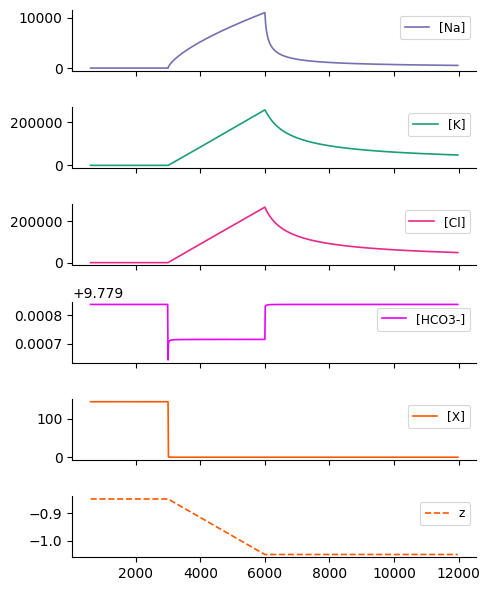

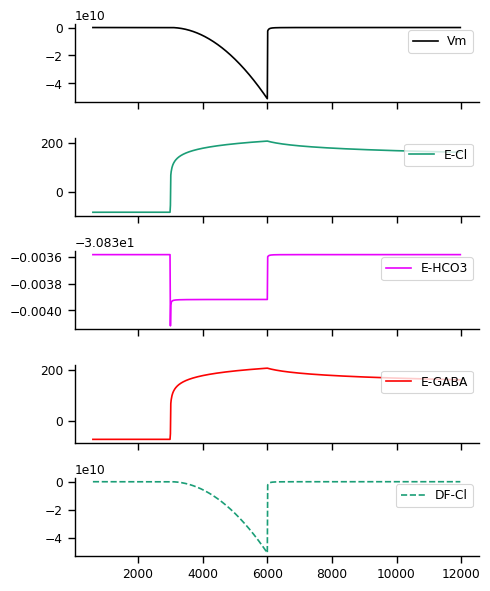

In [14]:
#################################################################
# DEFINE DATA


R = 8.31446
F: float = 96485.33  # Faraday's constant        C mol-1
T = 37 + 273.15
RTF = R * T / F


na_arr = [master_arr[0][i][3]*1e3 for i in range(len(t_arr))]
k_arr = [master_arr[0][i][4]*1e3 for i in range(len(t_arr))]
cl_arr = [master_arr[0][i][5]*1e3 for i in range(len(t_arr))]
hco3_arr = [master_arr[0][i][6]*1e3 for i in range(len(t_arr))]
x_arr = [master_arr[0][i][7]*1e3 for i in range(len(t_arr))]
z_arr = [master_arr[0][i][8] for i in range(len(t_arr))]
vm_arr = [master_arr[0][i][9]*1e3 for i in range(len(t_arr))]
vol_arr = [master_arr[0][i][2]*1e13 for i in range(len(t_arr))]

nao_arr = [master_arr[1][i][3]*1e3 for i in range(len(t_arr))]
ko_arr = [master_arr[1][i][4]*1e3 for i in range(len(t_arr))]
clo_arr = [master_arr[1][i][5]*1e3 for i in range(len(t_arr))]
hco3o_arr = [master_arr[1][i][6]*1e3 for i in range(len(t_arr))]
xo_arr = [master_arr[1][i][7]*1e3 for i in range(len(t_arr))]
zo_arr = [master_arr[1][i][8] for i in range(len(t_arr))]

       
E_k_arr = [-1 * RTF * np.log(k_arr[i] / ko_arr[i])*1e3 for i in range(len(t_arr))]
E_cl_arr = [RTF * np.log(cl_arr[i] / clo_arr[i])*1e3 for i in range(len(t_arr))]
E_hco3_arr = [RTF * np.log(hco3_arr[i] / hco3o_arr[i])*1e3 for i in range(len(t_arr))] 

numerator = [4 / 5 * cl_arr[i] + 1 / 5 * hco3_arr[i] for i in range(len(t_arr))] 
denominator = [4 / 5 * clo_arr[i] + 1 / 5 * hco3o_arr[i] for i in range(len(t_arr))] 
E_gaba_arr = [RTF * np.log(numerator[i] / denominator[i])*1e3 for i in range(len(t_arr))]   


df_cl_arr = [vm_arr[i] - E_cl_arr[i]  for i in range(len(t_arr))] 
df_gaba_arr = [vm_arr[i] - E_gaba_arr[i]  for i in range(len(t_arr))] 


####################################################################
# SET TIMING BUFFER

#tmin_arr = [t_arr[i]/60 for i in range(len(t_arr))]

buffer = 50
final = -1
####################################################################
# DEFINE FIGURE AND AXES 

f1, axs = mplt.subplots(6,1, gridspec_kw={ 'height_ratios': [1, 1,1,1,1,1]}, figsize=(5,6), sharex=True)
sns.set_context('paper')
col_arr= [ '#e7298a', '#1b9e77', '#7570b3' ,'#FF5800','#e803fc'] #cl,k,na,x,hco3

# ##################################################################



#sns.despine(ax = ax_1A, offset=2)


axs[0].plot(t_arr[buffer:final], na_arr[buffer:final],color=col_arr[2], label ='[Na]')
axs[1].plot(t_arr[buffer:final], k_arr[buffer:final],color=col_arr[1], label='[K]')
axs[2].plot(t_arr[buffer:final], cl_arr[buffer:final], color=col_arr[0], label='[Cl]')
axs[3].plot(t_arr[buffer:final], hco3_arr[buffer:final], color=col_arr[4], label='[HCO3-]')
axs[4].plot(t_arr[buffer:final], x_arr[buffer:final], color=col_arr[3], label='[X]')
axs[5].plot(t_arr[buffer:final], z_arr[buffer:final], color=col_arr[3],linestyle='--', label='z')


#ax_1A.tick_params(axis='both', which='major', labelsize=6)

#ax_1A.legend(bbox_to_anchor=(1,0.06), loc = 'lower left', frameon=False,fontsize=4)

#ax_1A.set_ylabel("Voltage(mv)",fontsize=6)


sns.set_context('paper')
sns.despine()

for ax in axs.flat:
    ax.legend(loc='upper right') # Adjust the location and appearance of the legend

mplt.tight_layout()


f2, axs = mplt.subplots(5,1, gridspec_kw={ 'height_ratios': [1,1, 1,1,1]}, figsize=(5,6), sharex=True)
sns.set_context('paper')

axs[0].plot(t_arr[buffer:final], vm_arr[buffer:final],color="#000000", label ='Vm')
axs[1].plot(t_arr[buffer:final], E_cl_arr[buffer:final],color=col_arr[1], label='E-Cl')
axs[2].plot(t_arr[buffer:final], E_hco3_arr[buffer:final], color=col_arr[4], label='E-HCO3')
axs[3].plot(t_arr[buffer:final], E_gaba_arr[buffer:final], color="#fc0303", label='E-GABA')
axs[4].plot(t_arr[buffer:final], df_cl_arr[buffer:final], color=col_arr[1], linestyle='--',label='DF-Cl')

sns.set_context('paper')
sns.despine()

for ax in axs.flat:
    ax.legend(loc='upper right') # Adjust the location and appearance of the legend

mplt.tight_layout()

#####################################################################


'''
sns.despine(ax = ax_2A, offset=2)

sns.set_context('paper')
ax_2A.plot(tmin_arr[buffer:], cl_arr[buffer:],color=col_arr[1], label = '[Cl]i')


ax_2A.set_ylabel("[Cl]i (mM)",fontsize=6)

ax_2A.set_xlabel("Time (min)",fontsize=6)

ax_2A.tick_params(axis='both', which='major', labelsize=6)


mplt.subplots_adjust(hspace=0.35) 

#######################################

#f1.savefig('ORCHID_z_change.svg', dpi=2000, bbox_inches='tight')
'''

In [15]:
len(t_arr)

1000

In [16]:
start_int = 0

print(f"Initial time point @ {round(t_arr[start_int])} s")
print("")

print(f"[X]o: {round(xo_arr[start_int],2)} mM ----> {round(xo_arr[-1],2)} mM ({round(xo_arr[-1]-xo_arr[start_int],2)})" )
print(f"zo: {round(zo_arr[start_int],2)}  ----> {round(zo_arr[-1],2) }  ({round(zo_arr[-1]-zo_arr[start_int],2)})" )
print(f"----------------------------------------- " )

print(f"[Na]i: {round(na_arr[start_int],2)} mM ----> {round(na_arr[-1],2)} mM ({round(na_arr[-1]-na_arr[start_int],2)})" )
print(f"[K]i: {round(k_arr[start_int],2)} mM ----> {round(k_arr[-1],2) } mM ({round(k_arr[-1]-k_arr[start_int],2)})"  )
print(f"[Cl]i: {round(cl_arr[start_int],2)} mM ----> {round(cl_arr[-1],2)} mM ({round(cl_arr[-1]-cl_arr[start_int],2)})"  )
print(f"[HCO3]i: {round(hco3_arr[start_int],2)} mM ----> {round(hco3_arr[-1],2)} mM ({round(hco3_arr[-1]-hco3_arr[start_int],2)})"  )
print(f"[X]i: {round(x_arr[start_int],2)} mM ----> {round(x_arr[-1],2)} mM ({round(x_arr[-1]-x_arr[start_int],2)})" )
print(f"zi: {round(z_arr[start_int],2)} mM ----> {round(z_arr[-1],2)} mM ({round(z_arr[-1]-z_arr[start_int],2)})" )
print(f"----------------------------------------- " )

print(f"Vm: {round(vm_arr[start_int],2)} mV ----> {round(vm_arr[-1],2)} mV ({round(vm_arr[-1]-vm_arr[start_int],2)})" )
print(f"EK: {round(E_k_arr[start_int],2)} mV ----> {round(E_k_arr[-1],2)} mV ({round(E_k_arr[-1]-E_k_arr[start_int],2)})" )
print(f"ECl: {round(E_cl_arr[start_int],2)} mV ----> {round(E_cl_arr[-1],2)} mV ({round(E_cl_arr[-1]-E_cl_arr[start_int],2)})" )
print(f"EGABA: {round(E_gaba_arr[start_int],2)} mV ----> {round(E_gaba_arr[-1],2)} mV ({round(E_gaba_arr[-1]-E_gaba_arr[start_int],2)})" )
print(f"DF-Cl: {round(df_cl_arr[start_int],2)} mv ----> {round(df_cl_arr[-1],2)} mV ({round(df_cl_arr[-1]-df_cl_arr[start_int],2)})" )
print(f"DF-GABA: {round(df_gaba_arr[start_int],2)} mv ----> {round(df_gaba_arr[-1],2)} mV ({round(df_gaba_arr[-1]-df_gaba_arr[start_int],2)})" )
print(f"----------------------------------------- " )
print(f"Volume: {round(vol_arr[start_int],2)} pL ----> {round(vol_arr[-1],2)} pL ({round(vol_arr[-1]-vol_arr[start_int],2)})" )
osmoi = round(na_arr[-1],7) + round(k_arr[-1],7) + round(cl_arr[-1],7) + round(x_arr[-1],7)
osmoo = round(nao_arr[-1],7) + round(ko_arr[-1],7) + round(clo_arr[-1],7) + round(xo_arr[-1],7)
osmo_diff = round((osmoi - osmoo),7)
print(f"Final osmo = {osmo_diff} mM")
electroi = round(na_arr[-1],7) + round(k_arr[-1],7) - round(cl_arr[-1],7) + (round(x_arr[-1],7)*z_arr[-1])
electroo = round(nao_arr[-1],7) + round(ko_arr[-1],7) - round(clo_arr[-1],7) + (round(xo_arr[-1],7)*zo_arr[-1])
electro_diff = round((electroi - electroo),5) 
print(f"Final electro = {electro_diff} mV")

Initial time point @ 0 s

[X]o: 7.5 mM ----> 7.5 mM (0.0)
zo: -1.0  ----> -1.0  (0.0)
----------------------------------------- 
[Na]i: 14.0 mM ----> 541.17 mM (527.17)
[K]i: 122.9 mM ----> 47783.13 mM (47660.23)
[Cl]i: 5.2 mM ----> 48314.52 mM (48309.32)
[HCO3]i: 15.0 mM ----> 9.78 mM (-5.22)
[X]i: 154.9 mM ----> 0.0 mM (-154.9)
zi: -0.85 mM ----> -1.05 mM (-0.2)
----------------------------------------- 
Vm: -69.8 mV ----> -437084.62 mV (-437014.82)
EK: -95.11 mV ----> -254.48 mV (-159.37)
ECl: -81.56 mV ----> 162.63 mV (244.2)
EGABA: -68.87 mV ----> 160.81 mV (229.69)
DF-Cl: 11.76 mv ----> -437247.25 mV (-437259.02)
DF-GABA: -0.93 mv ----> -437245.44 mV (-437244.51)
----------------------------------------- 
Volume: 19.63 pL ----> 20201855436140.9 pL (20201855436121.26)
Final osmo = 96372.8209819 mM
Final electro = -21.2202 mV


In [74]:
print(max(vm_arr[buffer:]))

-64.26118116699531


In [78]:
def rev_rate(forward_rate):
    return(-5e-11+forward_rate*0.0016)/(0.01*6.3e-8)

rev_rate(1)

2539682.4603174604

# Dynamics figures

## Flexible y-axes

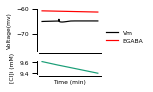

In [76]:
####################################################################
# SET TIMING BUFFER

tmin_arr = [t_arr[i]/60 for i in range(len(t_arr))]
buffer = 0
final = -1
####################################################################
# DEFINE FIGURE AND AXES 

f1, [ax_1A, ax_2A] = mplt.subplots(2,1, gridspec_kw={ 'height_ratios': [1, 0.3]}, figsize=(1.1,1.2), sharex=True)
sns.set_context('paper')
col_arr= [ '#e7298a', '#1b9e77', '#7570b3' ,'#FF5800']

###################################################################



sns.despine(ax = ax_1A, offset=2)


ax_1A.plot(tmin_arr[buffer:final], vm_arr[buffer:final],color='#000000', label ='Vm')
#ax_1A.plot(tmin_arr[buffer:final], E_k_arr[buffer:],color=col_arr[2], label='Ek')
#ax_1A.plot(tmin_arr[buffer:final], E_cl_arr[buffer:], color=col_arr[1], label='ECl')
ax_1A.plot(tmin_arr[buffer:final], E_gaba_arr[buffer:final], color='red', label='EGABA')
ax_1A.tick_params(axis='both', which='major', labelsize=6)

ax_1A.legend(bbox_to_anchor=(1,0.06), loc = 'lower left', frameon=False,fontsize=6)

ax_1A.set_ylabel("Voltage(mv)",fontsize=6)

#ax_1A.set_ylim(-75,-60)
ax_1A.set_ylim(-77,-60)
custom_tick_positions = [50, 100, 150]
custom_tick_labels = ['50', '100', '150']
ax_1A.set_xticks(custom_tick_positions)
ax_1A.set_xticklabels(custom_tick_labels)

sns.set_context('paper')

#####################################################################



sns.despine(ax = ax_2A, offset=2)

sns.set_context('paper')
ax_2A.plot(tmin_arr[buffer:final], cl_arr[buffer:final],color=col_arr[1], label = '[Cl]i')


ax_2A.set_ylabel("[Cl]i (mM)",fontsize=6)

ax_2A.set_xlabel("Time (min)",fontsize=6)

ax_2A.tick_params(axis='both', which='major', labelsize=6)

# Set y-axis limits
#ax_2A.set_ylim(3, 12)


mplt.subplots_adjust(hspace=0.35) 

#######################################


file_name = "ORCHID_dynamicBicarb_zChange.svg"
current_folder = os.getcwd()
# Get the parent folder of the current working directory
parent_folder = os.path.dirname(os.path.abspath(current_folder))
hdf5_folder = os.path.join(parent_folder, "Jupyter_outputs")
# Create the "HDF5_files" folder if it doesn't exist
if not os.path.exists(hdf5_folder):
    os.makedirs(hdf5_folder)

file_name = os.path.join(hdf5_folder, file_name)

#f1.savefig(file_name, dpi=2000, bbox_inches='tight')

## Fixed y-axes

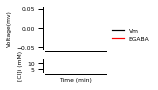

In [11]:
####################################################################
# SET TIMING BUFFER

tmin_arr = [t_arr[i]/60 for i in range(len(t_arr))]
buffer = 100
final = -1
####################################################################
# DEFINE FIGURE AND AXES 

f1, [ax_1A, ax_2A] = mplt.subplots(2,1, gridspec_kw={ 'height_ratios': [1, 0.3]}, figsize=(1.1,1.2), sharex=True)
sns.set_context('paper')
col_arr= [ '#e7298a', '#1b9e77', '#7570b3' ,'#FF5800']

###################################################################



sns.despine(ax = ax_1A, offset=2)


ax_1A.plot(tmin_arr[buffer:final], vm_arr[buffer:final],color='#000000', label ='Vm')
#ax_1A.plot(tmin_arr[buffer:final], E_k_arr[buffer:],color=col_arr[2], label='Ek')
#ax_1A.plot(tmin_arr[buffer:final], E_cl_arr[buffer:], color=col_arr[1], label='ECl')
ax_1A.plot(tmin_arr[buffer:final], E_gaba_arr[buffer:final], color='red', label='EGABA')
ax_1A.tick_params(axis='both', which='major', labelsize=6)

ax_1A.legend(bbox_to_anchor=(1,0.06), loc = 'lower left', frameon=False,fontsize=6)

ax_1A.set_ylabel("Voltage(mv)",fontsize=6)

#ax_1A.set_ylim(-76,-54)
custom_tick_positions = [50, 100, 150]
custom_tick_labels = ['50', '100', '150']
ax_1A.set_xticks(custom_tick_positions)
ax_1A.set_xticklabels(custom_tick_labels)

sns.set_context('paper')

#####################################################################



sns.despine(ax = ax_2A, offset=2)

sns.set_context('paper')
ax_2A.plot(tmin_arr[buffer:final], cl_arr[buffer:final],color=col_arr[1], label = '[Cl]i')


ax_2A.set_ylabel("[Cl]i (mM)",fontsize=6)

ax_2A.set_xlabel("Time (min)",fontsize=6)

ax_2A.tick_params(axis='both', which='major', labelsize=6)

# Set y-axis limits
#ax_2A.set_ylim(3, 12)
ax_2A.set_ylim(3, 13)

mplt.subplots_adjust(hspace=0.35) 

#######################################


file_name = "ORCHID_KCC2Block_fixY.svg"
current_folder = os.getcwd()
# Get the parent folder of the current working directory
parent_folder = os.path.dirname(os.path.abspath(current_folder))
hdf5_folder = os.path.join(parent_folder, "Jupyter_outputs")
# Create the "HDF5_files" folder if it doesn't exist
if not os.path.exists(hdf5_folder):
    os.makedirs(hdf5_folder)

file_name = os.path.join(hdf5_folder, file_name)

#f1.savefig(file_name, dpi=2000, bbox_inches='tight')